In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import skimage.io as io

from py_lib.common_utils import CommonUtiler
from py_lib.tf_mrnn_decoder import mRNNDecoder
from py_lib.vision import ImageFeatureExtractor

import pylab
pylab.rcParams['figure.figsize'] = (6.0, 4.0)

In [2]:
# set up paths
mrnn_model_path = './trained_models/coco_caption/mrnn_GRU_570K.ckpt'
mrnn_config_path = './model_conf/mrnn_GRU_conf.py'
mrnn_vocab_path = './trained_models/coco_caption/mscoco_mc3_vocab'
img_model_path = './external/tf_cnn_models/inception_v3.pb'

# initilize feature extractor and sentence decoder
cu = CommonUtiler()
config = cu.load_config(mrnn_config_path)
ife = ImageFeatureExtractor(img_model_path)
decoder = mRNNDecoder(config, 'demo', mrnn_vocab_path)

[18 Feb 17:03:22 - vision.py:line   27] Vision graph loaded from ./external/tf_cnn_models/inception_v3.pb


In [3]:
demo_image_path = 'demo_image.jpg'
beam_size = 3
# extract visual feature for the image
visual_features = ife.extract_features(demo_image_path, 
                                       flag_from_file=True)
# generate sentences
decoder.load_model(mrnn_model_path)
sentences = decoder.decode(visual_features, beam_size)

[18 Feb 17:03:31 - tf_mrnn_decoder.py:line   61] Load model from ./trained_models/coco_caption/mrnn_GRU_570K.ckpt


Top generated sentences and their log-likelihood:
  0 (4.13): a group of people standing on top of a sandy beach
  1 (5.21): a group of people standing on top of a beach
  2 (6.55): a group of people standing on a beach with surfboards


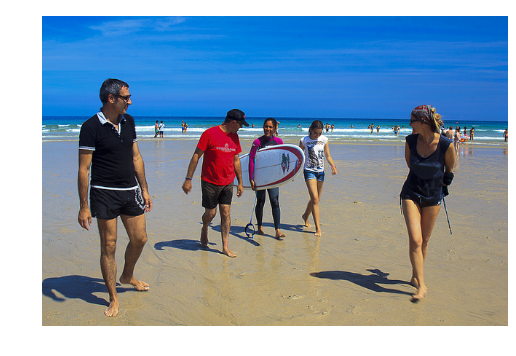

In [4]:
# Visualize the result
print('Top generated sentences and their log-likelihood:')
for (ind_s, sentence) in enumerate(sentences):
    print('  %d (%.2f): %s' % (ind_s, sentence['score'], 
                               ' '.join(sentence['words'])))
    
I = io.imread(demo_image_path)
plt.imshow(I)
plt.axis('off')
plt.show()